In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


In [0]:
train = pd.read_csv('titanic/train.csv')
test = pd.read_csv('/titanic/test.csv')


In [0]:
y_train = train['Survived']

In [0]:
train.drop('Survived',axis = 1,inplace = True)

In [0]:
full = pd.concat([train,test])

In [0]:
full = full.reset_index()

In [0]:
def title(text):
    a = text.split(',')
    b = a[1].split('.')
    return b[0]

In [0]:
full['title'] = full['Name'].apply(title)

In [13]:
#missing data
for col in full.columns:
    print("empty points in {} column are {} out of {}".format(col,sum(full[col].isnull()),full.shape[0]))

empty points in index column are 0 out of 1309
empty points in PassengerId column are 0 out of 1309
empty points in Pclass column are 0 out of 1309
empty points in Name column are 0 out of 1309
empty points in Sex column are 0 out of 1309
empty points in Age column are 263 out of 1309
empty points in SibSp column are 0 out of 1309
empty points in Parch column are 0 out of 1309
empty points in Ticket column are 0 out of 1309
empty points in Fare column are 1 out of 1309
empty points in Cabin column are 1014 out of 1309
empty points in Embarked column are 2 out of 1309
empty points in title column are 0 out of 1309


In [14]:
#Average age of persons w.r.t. title 
a =  [' Capt', ' Col', ' Don', ' Dona', ' Dr', ' Jonkheer', ' Lady', ' Major', ' Master', ' Miss', ' Mlle', ' Mme', ' Mr', ' Mrs', ' Ms', ' Rev', ' Sir', ' the Countess']
for i in a:
    print("the average age of a person with title {} is {}".format(i,full[full['title']== i]['Age'].mean()))

the average age of a person with title  Capt is 70.0
the average age of a person with title  Col is 54.0
the average age of a person with title  Don is 40.0
the average age of a person with title  Dona is 39.0
the average age of a person with title  Dr is 43.57142857142857
the average age of a person with title  Jonkheer is 38.0
the average age of a person with title  Lady is 48.0
the average age of a person with title  Major is 48.5
the average age of a person with title  Master is 5.482641509433963
the average age of a person with title  Miss is 21.774238095238097
the average age of a person with title  Mlle is 24.0
the average age of a person with title  Mme is 24.0
the average age of a person with title  Mr is 32.25215146299484
the average age of a person with title  Mrs is 36.99411764705882
the average age of a person with title  Ms is 28.0
the average age of a person with title  Rev is 41.25
the average age of a person with title  Sir is 49.0
the average age of a person with titl

In [0]:
#filling missing age values with average age of people with same title

for i in a:
    full.iloc[full[full['title'] == i].index,5] = full[full['title'] == i]['Age'].mean()

In [16]:
for col in full.columns:
    print("empty points in column {}  are {} out of {}".format(col,sum(full[col].isnull()),full.shape[0]))

empty points in column index  are 0 out of 1309
empty points in column PassengerId  are 0 out of 1309
empty points in column Pclass  are 0 out of 1309
empty points in column Name  are 0 out of 1309
empty points in column Sex  are 0 out of 1309
empty points in column Age  are 0 out of 1309
empty points in column SibSp  are 0 out of 1309
empty points in column Parch  are 0 out of 1309
empty points in column Ticket  are 0 out of 1309
empty points in column Fare  are 1 out of 1309
empty points in column Cabin  are 1014 out of 1309
empty points in column Embarked  are 2 out of 1309
empty points in column title  are 0 out of 1309


In [0]:
#separating deck from cabin
def cabin(text):
    a = text[0]
    return a  

In [0]:
full['Deck'] = full[full['Cabin'].isnull()== False]['Cabin'].apply(cabin)

In [0]:
#separating room no. from cabin
def room(text):
    a = text.split()
    a = a[0]
    if len(a)>1:
        a = int(a[1:])
    else:
        a = 0
    return a

In [0]:
full["room_no"] = full[full["Cabin"].isnull()==False]["Cabin"].apply(room)

In [0]:
#defining region in deck according to range of room nos. and odd-even room nos as adjacent rooms in ship had either odd or even nos. 
a = np.arange(0,50,2)
b = np.arange(1,51,2)
c = np.arange(50,100,2)
d = np.arange(51,101,2)
e = np.arange(100,150,2)
f = np.arange(101,151,2)
g = np.arange(150,200,2)
h = np.arange(151,201,2)

i = 1
def region(num):
    if num == 'nan':
        pass
    else:
        global reg
        reg = None
        if num in a:
            reg = i
        elif num in b:
            reg = i+1
        elif num in c:
            reg = i+2
        elif num in d:
            reg = i+3  
        elif num in e:
            reg = i+4
        elif num in f:
            reg = i+5
        elif num in g:
            reg = i+6
        elif num in h:
            reg = i+7   
    return reg  


In [22]:
region(19)

2

In [0]:
#assinging region to room numbers without deck in range 1-8
full['region'] = full['room_no'].apply(region)

In [24]:
full.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Deck,room_no,region
0,0,1,3,"Braund, Mr. Owen Harris",male,32.252151,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,NaN,NaN
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.994118,1,0,PC 17599,71.2833,C85,C,Mrs,C,85.0,4.0
2,2,3,3,"Heikkinen, Miss. Laina",female,21.774238,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,NaN,NaN
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.994118,1,0,113803,53.1000,C123,S,Mrs,C,123.0,6.0
4,4,5,3,"Allen, Mr. William Henry",male,32.252151,0,0,373450,8.0500,NaN,S,Mr,NaN,NaN,NaN


In [0]:
#now we'll assign multiples of 8 to all regions deck wise, the no. to be added is in column add_no 

off = None
def offset(deck):
    global off
    off = None
    if deck == 'nan':
        pass
    else:
        if deck == 'A':
            off = 0
        elif deck == 'B':
            off = 8
        elif deck == 'C':
            off = 16
        elif deck =='D':
            off = 24
        elif deck == 'E':
            off = 32
        elif deck == 'F':
            off = 40
        elif deck == 'G':
            off = 48
        elif deck == 'T':
            off = 56
    return off
full['add_no'] = full['Deck'].apply(offset)


In [26]:
full.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Deck,room_no,region,add_no
0,0,1,3,"Braund, Mr. Owen Harris",male,32.252151,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,NaN,NaN,NaN
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.994118,1,0,PC 17599,71.2833,C85,C,Mrs,C,85.0,4.0,16.0
2,2,3,3,"Heikkinen, Miss. Laina",female,21.774238,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,NaN,NaN,NaN
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.994118,1,0,113803,53.1000,C123,S,Mrs,C,123.0,6.0,16.0
4,4,5,3,"Allen, Mr. William Henry",male,32.252151,0,0,373450,8.0500,NaN,S,Mr,NaN,NaN,NaN,NaN


In [0]:
full['final_region'] = full['region']+ full['add_no']
# finally we have distinct region numbers for different portion of different decks

In [28]:
full.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,title,Deck,room_no,region,add_no,final_region
0,0,1,3,"Braund, Mr. Owen Harris",male,32.252151,1,0,A/5 21171,7.2500,NaN,S,Mr,NaN,NaN,NaN,NaN,NaN
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.994118,1,0,PC 17599,71.2833,C85,C,Mrs,C,85.0,4.0,16.0,20.0
2,2,3,3,"Heikkinen, Miss. Laina",female,21.774238,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,NaN,NaN,NaN,NaN,NaN
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.994118,1,0,113803,53.1000,C123,S,Mrs,C,123.0,6.0,16.0,22.0
4,4,5,3,"Allen, Mr. William Henry",male,32.252151,0,0,373450,8.0500,NaN,S,Mr,NaN,NaN,NaN,NaN,NaN


In [0]:
#filling missing fare with mean fare
full['Fare'].fillna(full['Fare'].mean(), inplace = True)

In [0]:
#using ticket fare, no. of siblings , no of parent children, class we'll find region using random forest 

region_df = full[full['Cabin'].isnull()==False][['Pclass','SibSp','Parch','Fare','final_region']]

In [31]:
#check if any missing data
region_df[region_df['final_region'].isnull()].index

Int64Index([], dtype='int64')

In [0]:
region_df_y = region_df['final_region']
region_df = region_df.iloc[:,:-1]

In [33]:
region_df_y.shape

(295,)

In [0]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(n_estimators=10000,random_state = 13,max_features= None)
#splitting data where cabin no. is present for prediction of missing data

In [0]:
region_train_x,region_test_x = region_df[:200], region_df[200:]

In [0]:
region_train_y, region_test_y = region_df_y[:200], region_df_y[200:]

In [37]:
from sklearn.metrics import accuracy_score
#trying different parameters
sample_leaf_options = [0.00001,0.0001,0.001,0.01,0.1,0.3]
for f in sample_leaf_options :
    cl = RandomForestClassifier(n_estimators = 500,min_weight_fraction_leaf = f, n_jobs = -1,random_state =50,max_features = None, min_samples_leaf = 1)
    cl.fit(region_train_x,region_train_y)
    print(accuracy_score(region_test_y,cl.predict(region_test_x)))

0.4631578947368421
0.4631578947368421
0.4631578947368421
0.4421052631578947
0.18947368421052632
0.16842105263157894


In [38]:
cl = RandomForestClassifier(n_estimators = 500,min_weight_fraction_leaf = 0.00001, n_jobs = -1,random_state =50,max_features = None, min_samples_leaf = 1)
cl.fit(region_train_x,region_train_y)
accuracy_score(region_test_y,cl.predict(region_test_x))

0.4631578947368421

In [39]:
#fitting on available data
cl.fit(region_df,region_df_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=1e-05, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=50, verbose=0, warm_start=False)

In [40]:
region_df.head()


,Pclass,SibSp,Parch,Fare
1,1,1,0,71.2833
3,1,1,0,53.1000
6,1,0,0,51.8625
10,3,1,1,16.7000
11,1,0,0,26.5500


In [41]:
region_df.shape

(295, 4)

In [52]:
sum(full.Cabin.isnull())

1014

In [0]:
# taking dataframe of missing cabin rows
region_df_com = full[full['Cabin'].isnull()][['Pclass','SibSp','Parch','Fare']]

In [0]:
a = full[['Pclass','SibSp','Parch','Fare']]

In [56]:
for i in a.columns:
  print(sum(a[i].isnull()))

0
0
0
0


In [43]:
#checking if any missing data 
for i in region_df_com.columns:
  print(sum(region_df_com[i].isnull()))

0
0
0
0


In [44]:
region_df_com.shape

(1014, 4)

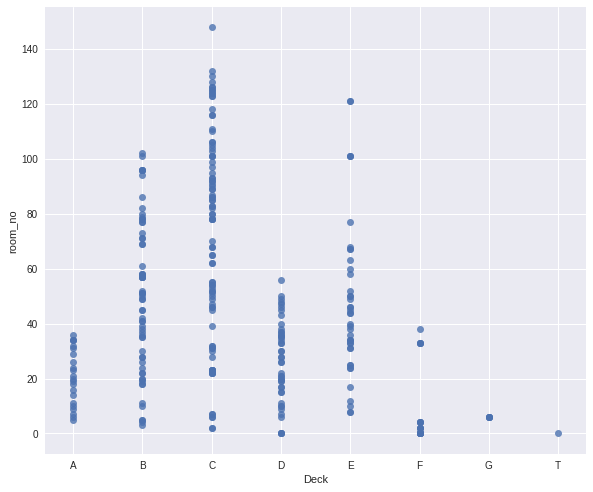

In [64]:
import seaborn as sns
sns.lmplot(x = 'Deck', y = 'room_no',data = full[full['Deck'].isnull()== False], size = 7, aspect = 1.2, fit_reg = False,palette="Set1")
#from the below graph it is evident that the available data is not uniformaly distributed in every deck
#this is a problem as tree based model will not predict the regions/cabins it has not seen in training data

In [63]:
full.columns

Index(['index', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'Deck',
       'room_no', 'region', 'add_no', 'final_region'],
      dtype='object')

In [45]:
cl.fit(region_df,region_df_y)
cl.predict(region_df_com)

array([41., 33., 33., ..., 41., 33., 41.])

In [60]:
len(np.unique(cl.predict(region_df_com)))

20

In [77]:
len(set(full[full.room_no.isnull()== False]['room_no']))

105

In [0]:
region_df_com['final_region'] = cl.predict(region_df_com)

In [47]:
region_df_com[region_df_com['Fare'].isnull()].index

Int64Index([], dtype='int64')

In [0]:
#filling predicted data in full data
full.iloc[np.array(region_df_com.index),17] = region_df_com['final_region']

In [49]:
#check missing data
for i in full.columns:
    print(sum(full[i].isnull()))

0
0
0
0
0
0
0
0
0
0
1014
2
0
1014
1014
1014
1014
0


In [50]:
full.columns

Index(['index', 'PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'title', 'Deck',
       'room_no', 'region', 'add_no', 'final_region'],
      dtype='object')

In [0]:
full.drop(['Cabin','Deck','room_no','region','add_no'], axis = 1, inplace = True)

In [53]:
#sems there is missing data in Embarked column
for i in full.columns:
    print(sum(full[i].isnull()))

0
0
0
0
0
0
0
0
0
0
2
0
0


In [0]:
full['Embarked'] = full['Embarked'].fillna('S')

In [58]:
for i in full.columns:
    print(sum(full[i].isnull()))

0
0
0
0
0
0
0
0
0
0
0
0
0


In [0]:
#as we know that our region predictions cannot be accurate since random forest will not predict regions that were absent in train
#make a new columns for assign 1 to columns where cabin no. was present 0 for missing this will provide information for present/absent data
full['region_augmented'] = np.zeros(full.shape[0])
full.iloc[np.array(region_df.index),13] = 1

In [70]:

full.head()

,index,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,title,final_region,region_augmented
0,0,1,3,"Braund, Mr. Owen Harris",male,32.252151,1,0,A/5 21171,7.2500,S,Mr,41.0,0.0
1,1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,36.994118,1,0,PC 17599,71.2833,C,Mrs,20.0,1.0
2,2,3,3,"Heikkinen, Miss. Laina",female,21.774238,0,0,STON/O2. 3101282,7.9250,S,Miss,33.0,0.0
3,3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,36.994118,1,0,113803,53.1000,S,Mrs,22.0,1.0
4,4,5,3,"Allen, Mr. William Henry",male,32.252151,0,0,373450,8.0500,S,Mr,33.0,0.0


In [51]:
set(full.iloc[:,10])

{'A10',
 'A11',
 'A14',
 'A16',
 'A18',
 'A19',
 'A20',
 'A21',
 'A23',
 'A24',
 'A26',
 'A29',
 'A31',
 'A32',
 'A34',
 'A36',
 'A5',
 'A6',
 'A7',
 'A9',
 'B10',
 'B101',
 'B102',
 'B11',
 'B18',
 'B19',
 'B20',
 'B22',
 'B24',
 'B26',
 'B28',
 'B3',
 'B30',
 'B35',
 'B36',
 'B37',
 'B38',
 'B39',
 'B4',
 'B41',
 'B42',
 'B45',
 'B49',
 'B5',
 'B50',
 'B51 B53 B55',
 'B52 B54 B56',
 'B57 B59 B63 B66',
 'B58 B60',
 'B61',
 'B69',
 'B71',
 'B73',
 'B77',
 'B78',
 'B79',
 'B80',
 'B82 B84',
 'B86',
 'B94',
 'B96 B98',
 'C101',
 'C103',
 'C104',
 'C105',
 'C106',
 'C110',
 'C111',
 'C116',
 'C118',
 'C123',
 'C124',
 'C125',
 'C126',
 'C128',
 'C130',
 'C132',
 'C148',
 'C2',
 'C22 C26',
 'C23 C25 C27',
 'C28',
 'C30',
 'C31',
 'C32',
 'C39',
 'C45',
 'C46',
 'C47',
 'C49',
 'C50',
 'C51',
 'C52',
 'C53',
 'C54',
 'C55 C57',
 'C6',
 'C62 C64',
 'C65',
 'C68',
 'C7',
 'C70',
 'C78',
 'C80',
 'C82',
 'C83',
 'C85',
 'C86',
 'C87',
 'C89',
 'C90',
 'C91',
 'C92',
 'C93',
 'C95',
 'C97',
 'C

In [0]:
import lightgbm as lgb 

In [50]:

train.shape

(891, 11)

In [73]:
full.drop('PassengerId',axis = 1, inplace = True)
full.columns

Index(['index', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'title', 'final_region', 'region_augmented'],
      dtype='object')

In [0]:
#encoding each column as lightgbm only takes numerical data
from sklearn.preprocessing import LabelEncoder 
encode = LabelEncoder()
for i in [ 'Name', 'Sex','Ticket', 'Embarked','title']:
    full[i] = encode.fit_transform(full[i])

In [76]:
lgb_train = lgb.Dataset(full[:800], y_train[:800])
lgb_eval = lgb.Dataset(full[800:891], y_train[800:891], reference=lgb_train)

#configurations
params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'auc'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 2
}

print('Start training...')
#train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=20,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

Start training...
[1]	valid_0's auc: 0.859649
Training until validation scores don't improve for 5 rounds.
[2]	valid_0's auc: 0.866615
[3]	valid_0's auc: 0.867131
[4]	valid_0's auc: 0.863777
[5]	valid_0's auc: 0.859133
[6]	valid_0's auc: 0.865583
[7]	valid_0's auc: 0.871259
[8]	valid_0's auc: 0.873323
[9]	valid_0's auc: 0.876935
[10]	valid_0's auc: 0.876935
[11]	valid_0's auc: 0.881321
[12]	valid_0's auc: 0.879257
[13]	valid_0's auc: 0.881837
[14]	valid_0's auc: 0.889577
[15]	valid_0's auc: 0.885449
[16]	valid_0's auc: 0.881321
[17]	valid_0's auc: 0.882095
[18]	valid_0's auc: 0.881063
[19]	valid_0's auc: 0.878999
Early stopping, best iteration is:
[14]	valid_0's auc: 0.889577


In [0]:
sub = pd.read_csv('titanic/gender_submission.csv')

In [0]:
sub['Survived'] = gbm.predict(full[891:])

In [0]:
sub['Survived'] = sub['Survived'] > 0.5

In [0]:
sub['Survived'] =sub['Survived'].apply(int)

In [0]:
sub.to_csv('new_sub_newcol_lessregion.csv', index = False)

In [82]:
#this submission gave accuracy 0.80861 and leaderboard rank 777 out of 11156

Successfully submitted to Titanic: Machine Learning from Disaster